In [59]:
import hcipy
import numpy as np
import matplotlib.pyplot as plt

D_tel = 8.2  # meter
wavelength = 1e-6  # meter

pupil_grid = hcipy.make_pupil_grid(512, D_tel)
focal_grid = hcipy.make_focal_grid(8, 16, reference_wavelength=wavelength, f_number=0.3)
aperture = hcipy.make_circular_aperture(D_tel)(pupil_grid)

prop = hcipy.FraunhoferPropagator(pupil_grid, focal_grid)
wf = hcipy.Wavefront(aperture, wavelength)

fried_parameter = 0.2  # meter
outer_scale = 20  # meter

Cn_squared = hcipy.Cn_squared_from_fried_parameter(fried_parameter, wavelength)

In [60]:
layer = hcipy.FiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale)

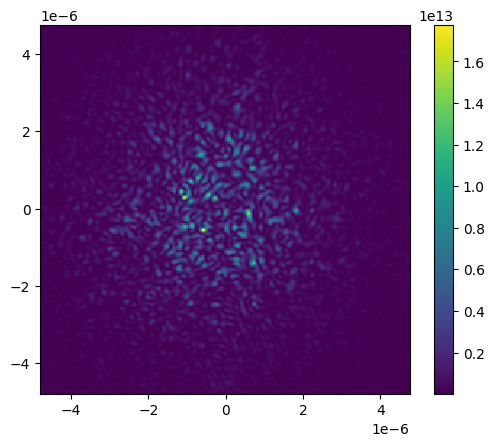

In [64]:
layer.reset()
img = prop(layer(wf))
#img = layer(wf)

#hcipy.imshow_field(np.log10(img.intensity / img.intensity.max()), vmin=-3)
hcipy.imshow_field(img.intensity)
plt.colorbar()
plt.show()

In [65]:
%timeit hcipy.FiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

25 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
%timeit prop(layer(wf))

6.43 ms ± 231 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit layer.reset()

23.4 ms ± 705 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
